# Average Coherence with Matrix and Circle Plots

This notebook will describe how to plot coherence between tetrode wires for a single time period.

## Extracting data from NeuroExplorer

To plot the data, we use a folder filled with `.csv` files, with each file containing the coherence between the local field potential (LFP) of one wire (used as a reference) and all other wires at a number of frequencies over a given time period.  Our NeuroExplorer `coherence_4_tetrodes.py` script and `coherence_4_tetrodes.ntp` template will generate such a directory, using a modified version of NeuroExplorer's "Coherence for Continous" analysis.

The example data used in this notebook was generated using the following steps:
1. Open the recording data file (from Plexon) in NeuroExplorer.  **All the LFPs are labeled using "FP##"** (this is how the code finds them).
2. Open the script `coherence_4_tetrodes.py` in NeuroExplorer's IDE.
3. Within the "parameters" section of the script, make sure the `template` variable points to the template `coherence_4_tetrodes`.  Double check that all other settings are appropriate.
4.  Run the script!

The output of this process is the folder `average coherence plot data` within the `exampledata` folder.  The example was generated from a recording of an animal with tetrodes in the ventral tegmental area (VTA), basolateral amygdala (BLA), nucleus accumbens (NAc), and prefrontal cortex (PFC).  The recording was a baseline recording with no other manipulations.

## Plotting

We import `coherence.py` below to make it's functions & classes available.  Most of the plots will work solely on the `average coherence plot data` directory, which will also be save in the variable `data`:

In [2]:
import coherence as co
data = r'exampledata/average coherence plot data/'

The function `co.coherence_plotter()` is the main tool for plotting coherence for a single output of `coherence_4_tetrodes.py`.  This can generate and save coherence plots for a number of frequency bands at the same time (though it doesn't actually `return` anything).  For display purposes, a few arguments will be always set in this notebook:
- `saving=False` to prevent plots being saved
- `prompt=False` to prevent a verification prompt before plotting.

You can call `help(co.coherence_plotter)` to see all its arguments & documentation.  

### Plot a coherence matrix

Matrix plot over all frequencies.

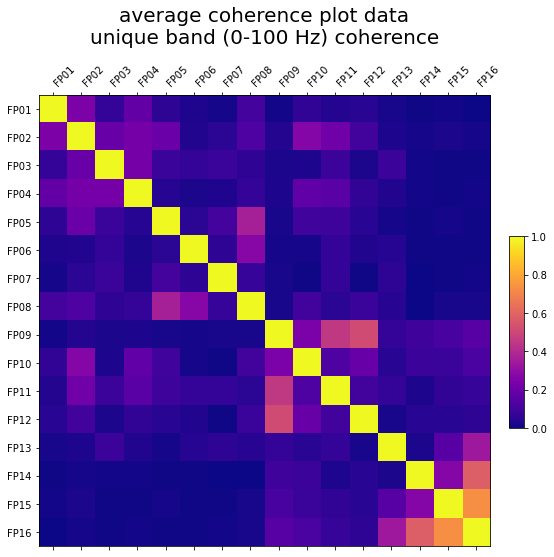

In [3]:
co.coherence_plotter(data, 
                     graph_type='matrix', 
                     hz_min=0, 
                     hz_max=100, 
                     saving=False,
                     prompt=False)

### Plot a coherence matrix for a given frequency band

Use canonical brain wave oscillation bands to set the frequencies.

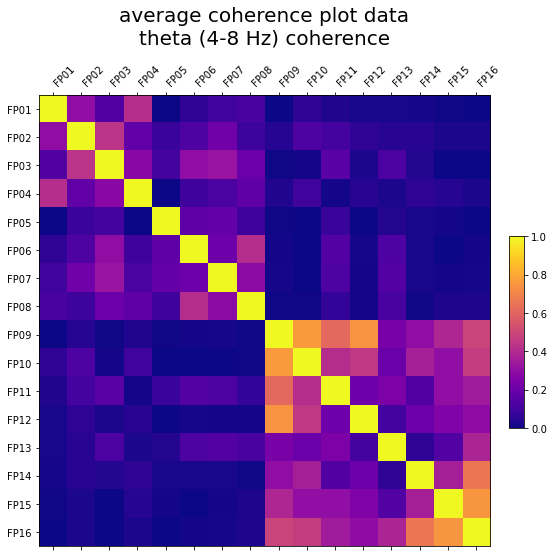

In [4]:
co.coherence_plotter(data, 
                     graph_type='matrix', 
                     bands='theta', 
                     saving=False,
                     prompt=False)

### Plot coherence data as a mandala circle plot

Using `plot_connectivity_circle()` from [mne](https://mne.tools/stable/generated/mne.viz.plot_connectivity_circle.html#mne.viz.plot_connectivity_circle), and `classic=True` to match their default style.

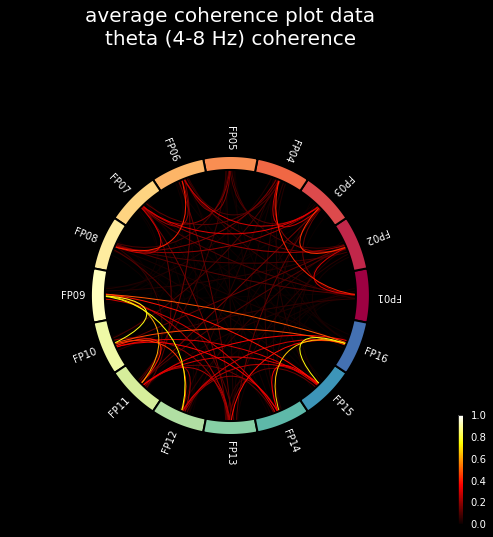

In [5]:
co.coherence_plotter(data, 
                     graph_type='circle', 
                     bands='theta', 
                     saving=False,
                     prompt=False,
                     classic=True)

### Label wire names

Two types of keyword arguments (\*\*kwargs, non-specified keyword arguments passed after all other arguments) can be passed to label wires according to their region names:
- arguments formatted with the syntax: `reg_REGIONNAME=WIRENUMBERS`
- instances of `co.Region` from coherence.py, passed with an arbitrary argument name:
```
doesntmatter = co.Region('VTA', range(1,4))
```


   

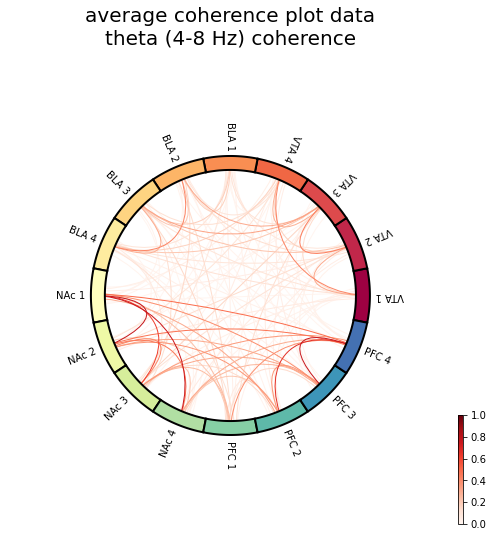

In [6]:
VTA = co.Region('VTA', range(1,4))
BLA = co.Region('BLA', [5,6,7,8])

co.coherence_plotter(data, 
                     graph_type='circle', 
                     bands='theta', 
                     saving=False,
                     prompt=False,
                     vta=VTA,
                     bla=BLA,
                     reg_NAc=range(9,12),
                     reg_PFC=[13,14,15,16])

### Titling the plot

Passing `title_tag=True` will add a subtitle referring to the band frequency (as seen in other plots above).

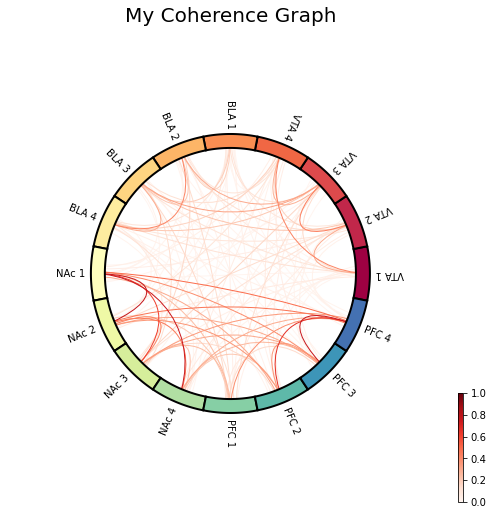

In [7]:
VTA = co.Region('VTA', range(1,4))
BLA = co.Region('BLA', [5,6,7,8])

co.coherence_plotter(data, 
                     graph_type='circle', 
                     bands='theta', 
                     saving=False,
                     prompt=False,
                     vta=VTA,
                     bla=BLA,
                     reg_NAc=range(9,12),
                     reg_PFC=[13,14,15,16],
                     user_title = "My Coherence Graph")

### Plot a subset of connections

Arguments `axis1` and `axis2` are `list` or `range` and limit the connections plotted.  They respectively correspond to rows and columns.  When not specified, all connections will be plotted.

Note that the numbers should correspond to 1-index wire numbers rather than Python 0-index.


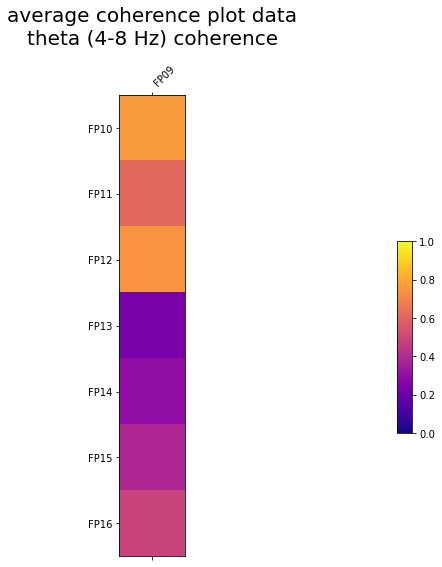

In [8]:
co.coherence_plotter(data, 
                     graph_type='matrix', 
                     bands='theta', 
                     saving=False,
                     prompt=False,
                     classic=True,
                     axis1 = range(10,16),
                     axis2 = [9])

### Plot a series of graphs at once

Both the `bands` and `graph_type` arguments can take a list of possible values.  `bands` also accepts `'all'` to plot all the canonical brain wave oscillation bands.  All possible plots can be made by calling `bands='all'` and `graph_type=['circle','matrix']`

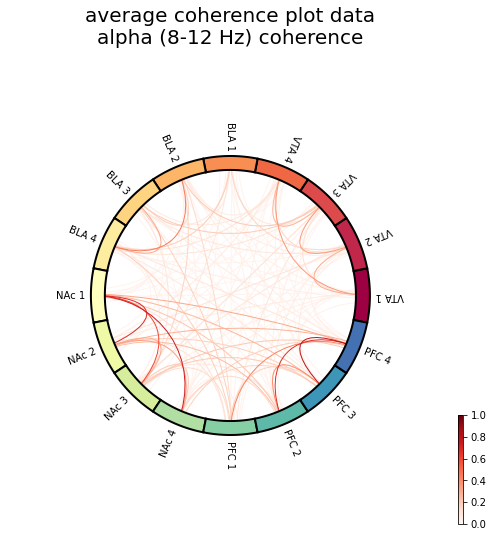

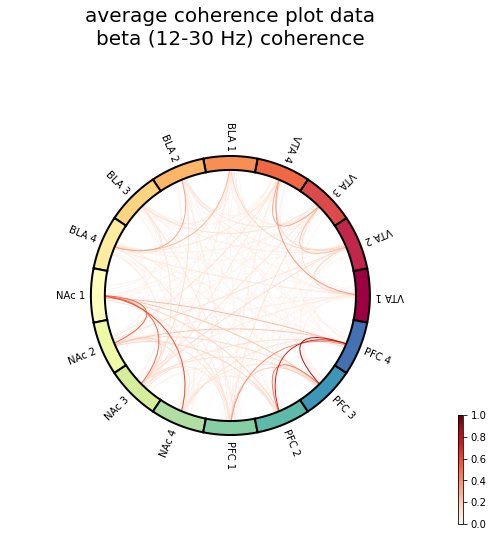

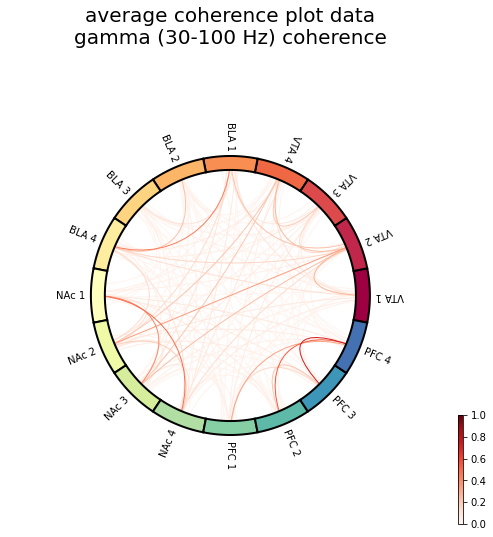

In [9]:
VTA = co.Region('VTA', range(1,4))
BLA = co.Region('BLA', [5,6,7,8])

co.coherence_plotter(data, 
                     graph_type='circle', 
                     bands=['alpha', 'beta', 'gamma'], 
                     saving=False,
                     prompt=False,
                     vta=VTA,
                     bla=BLA,
                     reg_NAc=range(9,12),
                     reg_PFC=[13,14,15,16])

### Subtract data from two time points

Passing a second correctly formatted directory to `folder2` will allow subtraction of data.

*Note: for this example, the subtracted data comes from a different mouse recording, which is not recommended.  Better use is plotting 2 phases of the same recording, like before and after an experimental manipulation.*

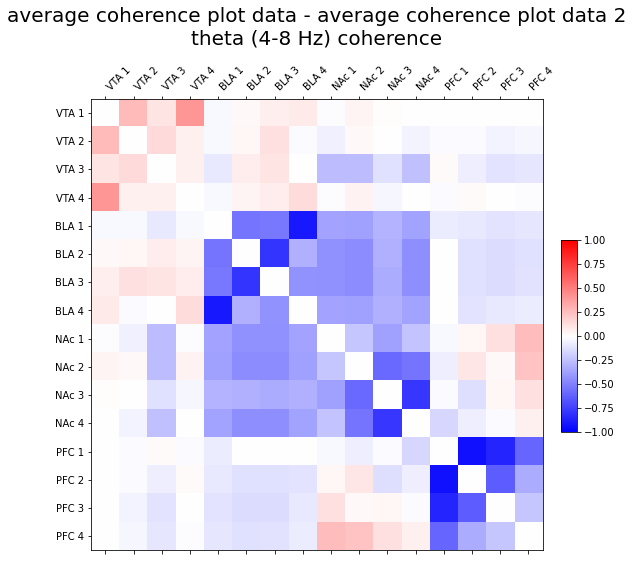

In [10]:
data2 = r"exampledata\average coherence plot data 2"

VTA = co.Region('VTA', range(1,4))
BLA = co.Region('BLA', [5,6,7,8])

co.coherence_plotter(data, 
                     graph_type='matrix', 
                     bands= 'theta',
                     folder2 = data2,
                     saving=False,
                     prompt=False,
                     vta=VTA,
                     bla=BLA,
                     reg_NAc=range(9,12),
                     reg_PFC=[13,14,15,16])

### Saving plots

There are a few arguments which can be passed to save plots:
- `saving=True` to save plots
- `savepath` to choose the save directory (if `'default'`, will be the Desktop)
- `savename` name to give folder to save plots in
- `makedir` whether or not to make a new folder when plots are saved

Plots will be saved with generic names like `theta circle.png`, and can overwrite each other if saved in the same directory.  Therefore `makedir=True` prevents overwriting by always creating a new folder.

# Updates/Bugs

## 2.18.2020

A `.plot()` method has been added to the `Coherence_Matrix` class, to allow for quick plotting of loaded data.  The method returns a matplotlib figure which can than be further edited.  However, this doesn't work for circle plots, where the parameters must be set when calling `mne.plot_connectivity_circle()`.

Text(0.5, 42.0, 'more coherence')

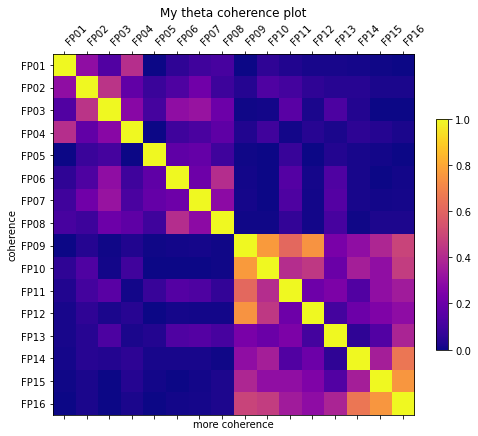

In [11]:
import matplotlib.pyplot as plt

mouse1 = co.Coherence_Matrix(data, band = 'theta')

graph = mouse1.plot('matrix')
plt.title('My theta coherence plot')
plt.ylabel('coherence')
plt.xlabel('more coherence')